<a href="https://colab.research.google.com/github/Efrat-p1/product_tree/blob/main/Project1_manage_product_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### project goal: manage product tree 
A tree is a widely used abstract data type that simulates a hierarchical tree structure, with a root value and subtrees of children with a parent node, represented as a set of linked nodes.

The purpose of the project is to track the **weight, center of gravity and cost** of assemnly product. 

input files:
csv file that export from cad software (nx, solid works, catia etc.)
This tool allows  to edit the product tree: delete and add branches.

In addition, this tool creats summary report that includes quantities and costs of assembly.

"Product tree" contain two types of objects: "Assembly" and "Leaf"
* "Leaf" holds weight data and center of gravity.
* "Assembly" holds list of his children
Through the classes methods it is possible to calculate the weight and c.g for assemblies.

To test the tool, four "csv" files were created and were saved in github.

1. tree- table
2. tree- chair
3. leaves costs
4. assembly- labor time

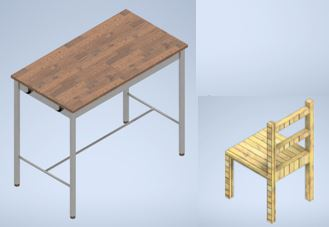

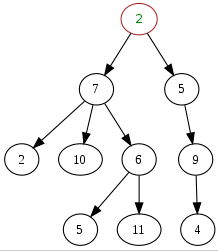

# Installations, main classes and functions

In [ ]:
pip install treelib

  Created wheel for treelib: filename=treelib-1.6.1-py3-none-any.whl size=18386 sha256=9dcbcd5ee5badfdc61c147e76239bf8a8f72e3022c9270c7336a8056db533968
  Stored in directory: /root/.cache/pip/wheels/89/be/94/2c6d949ce599d1443426d83ba4dc93cd35c0f4638260930a53
Successfully built treelib


In [ ]:
pip install colorama

In [ ]:
import csv
import secrets
import matplotlib.pyplot as plt
import requests
import colorsys
from colorama import Fore, Back, Style
from collections import Counter         # container that will hold the count of each of the elements present in the container.
from treelib import Node, Tree          # a Python library which assist to deal with large, hierarchical data sets.
from datetime import datetime           # The datetime module supplies classes for manipulating dates and times

In [ ]:
#classes
class GenericItem:
    """
    GenericItem is temperary class before the object is classified to Leaf or Assembly
    """
    def __init__(self, level, pn, description, mass, xchar, ychar, zchar):
        self.level = level
        self.pn = pn
        self.description = description
        self.mass = mass
        self.xchar = xchar
        self.ychar = ychar
        self.zchar = zchar
        self.children = []
 
    def __repr__(self):
        return f"{self.pn:<15} \
        {self.description:>15} \
        len: {len(self.children)}"  

class Leaf:
    """
    A class used to represent a Leaf. 
        Attributes
        ----------
        pn : str
        description : str
        mass : float
        xchar : float
        ychar : float
        zchar : float
    """
    def __init__(self, pn, description, mass, xchar, ychar, zchar):
        self.pn = pn
        self.description = description
        self.mass = mass
        self.xchar = xchar
        self.ychar = ychar
        self.zchar = zchar
        self.id = secrets.token_urlsafe(4)

    def __repr__(self):
        return f"{self.pn:<20} \
        {self.id:>5} \
        {self.mass:>6.2f} \
        {self.xchar:>6.0f} \
        {self.ychar:>6.0f} \
        {self.zchar:>6.0f}"

    def clone(self): 
        """returns cloned object (ןdentical values but a different id)"""
    
        return Leaf(self.pn, self.description, self.mass, self.xchar, self.ychar, self.zchar)

    def get_weight(self):
        return self.mass

    def get_cords(self):
        return [self.xchar, self.ychar, self.zchar]

    def print_breakdown_table(self,level):
        print(Back.WHITE+f'{level:<3} {self.pn:20} {self.description:35} {self.id:5} {self.mass:>8.2f}\
                {self.xchar:>6.0f} {self.ychar:>6.0f} {self.zchar:>6.0f}')

    def generate_tree(self, root=None, parent=None, verbose=1):

        if verbose == 1:
            label=self.pn
        elif verbose == 2:
            label=f'{self.pn} {self.description}'
        elif verbose == 3:        
            label=f'{self.pn} {self.description} {self.id}'

        root.create_node(label, self.id, parent=parent)


    def create_scatter_plot(self,data):
        return (self.mass, self.xchar, self.ychar, self.zchar)

    def get_leaf_data(self,leaf_data):
        return self.pn, self.description, self.mass ,(self.xchar, self.ychar, self.zchar)

    def move(self,x,y,z):
            self.xchar+=x
            self.ychar+=y
            self.zchar+=z

class Assembly:

    def __init__(self, pn, description, children):
        self.pn = pn
        self.description = description
        self.children = children
        self.id = secrets.token_urlsafe(4)

    def __repr__(self):
        return f"{self.pn:<15} \
        {self.description:>15} \
        {self.id:>5} \
        ch_qty: {len(self.children)}"

    def clone(self):
        """returns cloned object (with identical values but a different id)"""

        return Assembly(self.pn, self.description, [s.clone() for s in self.children])

    def get_weight(self):
        """returns assembly weight by recursion to all the children"""

        return sum(item.get_weight() for item in self.children)

    # def get_weight(self):
    #     sum_weight=0
    #     for item in self.children:
    #         sum_weight+= item.get_weight()
    #     return sum_weight

    def get_cords(self):
        """returns assembly coordinates by recursion to all the children"""
        sum_moments=[0,0,0]
        for item in self.children:
            item_moments=[ic*item.get_weight()  for ic in item.get_cords()]
            sum_moments=[x + y for x, y in zip(sum_moments, item_moments)]
        return [moment / self.get_weight() for moment in sum_moments]


    def generate_tree(self, root=None, parent=None, verbose=1):
        """draws tree by 'libtree' library.
        verbose=1   print PN
        verbose=2   print PN, Descriptin
        verbose=3   print PN, Descriptin, id
        """
        
        if root is None:
            root = Tree()

        if verbose == 1:
            label=self.pn
        elif verbose == 2:
            label=f'{self.pn} {self.description}'
        elif verbose == 3:        
            label=f'{self.pn} {self.description} {self.id}'

        root.create_node(label, self.id, parent=parent)

        for item in self.children:
            item.generate_tree(root=root, parent=self.id, verbose=verbose)
        return root

    def print_breakdown_table(self,level=1):
        """print table with weight and cg for each leaf and assembly.
        """
        print(Back.YELLOW+f'{level:<3} {self.pn:20} {self.description:35} {self.id:5} {self.get_weight():>8.2f}\
                {self.get_cords()[0]:>6.0f} {self.get_cords()[1]:>6.0f} {self.get_cords()[2]:>6.0f}'+Style.RESET_ALL)
        for item in self.children:
            item.print_breakdown_table(level+1)

    def delete_item(self,id):
        """delete item (leaf or assembly)
            delete leaf by remove it from children list
        """
        for child in self.children:
            if child.id == id:
                self.children.remove(child)
                print("id: ", id, " deleted")
                return True
            elif isinstance(child,Assembly) == True:
                if child.delete_item(id):
                    return True
        return False

    def get_leaf_data(self,leaf_data=None):
        """return list of all leaves data in the assembly.
            the list contains tupels of (pn, desc, w, (x,y,z))
        """
        if leaf_data == None:
            leaf_data=list()

        for item in self.children:
            temp=item.get_leaf_data(leaf_data)
            if len(temp) == 4:
                leaf_data.append(temp)

        return leaf_data

    def get_assembly_list(self,assembly_list=None):
        """return list of all assemblies data.
            the list contains tupels of (pn, desc)
        """
        if assembly_list == None:
            assembly_list=list()
            assembly_list.append((self.pn,self.description))

        for item in self.children:
            if isinstance(item,Assembly):
                item.get_assembly_list(assembly_list)
                assembly_list.append((item.pn, item.description))

        return assembly_list

    def create_report(self,cost_file,time_file,cost_per_hour):
        """create summary report:
            inputs: "cost_file"- file presents leaves (components) prices
                    "time_file"- file presents assembly labor time
                    "cost_per_hour"- hourly rate[$/hr]
            section 1- summary table
            section 2- leaves table
            section 3- asemblies time table        
        """
        leaves_list=self.get_leaf_data()
        assembly_list=self.get_assembly_list()

        cost_file_reader = Assembly.get_file_data(cost_file)
        time_file_reader = Assembly.get_file_data(time_file)

        pns,descs,weights, cgs = zip(*leaves_list)
        costs_dict=Counter(list(zip(pns,descs,weights)))
        costs_results=[]

        for pn,desc,weight in Counter(list(zip(pns,descs,weights))).keys():
            for pn1,desc1,cost in cost_file_reader: 
                if pn1==pn:
                    costs_results.append((pn1,desc1,weight,float(cost),costs_dict[(pn,desc,weight)]))        
        sum_weight=0
        sum_cost=0
        for reuslt in costs_results:
            sum_weight+=reuslt[2]*reuslt[4]
            sum_cost+=reuslt[3]*reuslt[4]

        results=[]
        for (pn,desc) in Counter(assembly_list).keys():
            for pn1,desc1,time in time_file_reader:
                if pn1 == pn:
                    results.append((pn,desc,float(time),Counter(assembly_list)[(pn,desc)]))

        total_time=0
        for result in results:
            total_time+=result[2]*result[3]


        #print table
        #section1
        now = datetime.now() # current date and time
        date_time = now.strftime("%d/%m/%Y, %H:%M:%S")
        print(Style.BRIGHT,f'{date_time:<20}',Style.RESET_ALL)
        print(Fore.RED + Style.BRIGHT,f'{"":30}{"REPORT":^20}',Style.RESET_ALL)
        print(Fore.RED + Style.BRIGHT,f'{"":30}{"PN: ":^5} {self.pn:<15}',Style.RESET_ALL)

        print()
        print(Fore.RED + Style.BRIGHT + f'{"Section1: Summary":25}'+Style.RESET_ALL)
        print(Style.BRIGHT + f'{"":15}|{"labor cost":^15}|{"time":^10}|{"cost":^10}|'+Style.RESET_ALL)
        print(Style.BRIGHT + f'{"":15}|{"[$/hr]":^15}|{"[h]":^10}|{"[$]":^10}|'+Style.RESET_ALL)
        print(Style.BRIGHT + f'{"-"*15:15}|{"-"*15:^15}|{"-"*10:^10}|{"-"*10:^10}|'+Style.RESET_ALL)
        print(Style.BRIGHT + f'{"materials":<15}|{"-":^15}|{"-":^10}|{sum_cost:^10.2f}|'+Style.RESET_ALL)
        print(Style.BRIGHT + f'{"labor":<15}|{cost_per_hour:^15}|{total_time:^10.2f}|{total_time*cost_per_hour:^10.2f}|'+Style.RESET_ALL)
        print(Style.BRIGHT + f'{"-"*15:15}|{"-"*15:^15}|{"-"*10:^10}|{"-"*10:^10}|'+Style.RESET_ALL)
        print(Style.BRIGHT + f'{""*15:15}|{""*15:^15}|{""*10:^10}|',Back.YELLOW+f'{(total_time*cost_per_hour+sum_cost):^9.2f}|'+Style.RESET_ALL)
        
        #section2
        print() 
        print(Fore.RED + Style.BRIGHT + f'{"Section2: BOM- bill of materials":25}'+Style.RESET_ALL)
        # print(Fore.RED + Style.BRIGHT,f'{"":30}{"BOM- bill of materials":^30}',Style.RESET_ALL)
        print()
        print(Style.BRIGHT + f'{"PN":^15}|{"Description":^15}|{"weight per":^10}|{"cost per":^10}|{"Qty":^8}|{"weight":^8}|{"cost":^8}'\
        +Style.RESET_ALL)
        print(Style.BRIGHT + f'{"":15}|{"":15}|{"unit[kg]":^10}|{"unit[$]":^10}|{"":8}|{"total":^8}|{"total":^8}'\
        +Style.RESET_ALL)
        print("-"*80)

        for reuslt in costs_results:
            print(f'{reuslt[0]:<15}|{reuslt[1]:<15}|{reuslt[2]:^10.2f}|{reuslt[3]:^10.2f}|{reuslt[4]:^8}|{reuslt[2]*reuslt[4]:^8.2f}|{reuslt[3]*reuslt[4]:^8.2f}')

        print(f'{"":15} {"":15} {"":^10} {"":^10} {"":8} {"-"*8:^8} {"-"*8:^8}')
        print(Style.BRIGHT + f'{"":15} {"":15} {"":^10} {"":^10} {"":8} {sum_weight:^8.2f} {sum_cost:^8.2f}'+Style.RESET_ALL)

        #section3
        print(Fore.RED + Style.BRIGHT + f'{"Section3: Assembly costs":25}'+Style.RESET_ALL)
        # print(Fore.RED + Style.BRIGHT,f'{"":30}{"Assembly costs":^30}',Style.RESET_ALL)
        print()
        print(Style.BRIGHT + f'{"PN":^15}|{"Description":^26}|{"labor":^10}|{"Qty":^8}|{"total":^8}'\
        +Style.RESET_ALL)
        print(Style.BRIGHT + f'{"":^15}|{"":^26}|{"time":^10}|{"":^8}|{"time":^8}'\
        +Style.RESET_ALL)
        print("-"*72)

       
        for result in results:
            print(f'{result[0]:<15}|{result[1]:<26}|{result[2]:^10.2f}|{result[3]:^8.0f}|{result[2]*result[3]:^8.2f}')


        print(f'{"":15} {"":25} {"":^10} {"":8} {"-"*8:^8}')
        print(Style.BRIGHT + f'{"":15} {"":26} {"":^10} {"":^8} {total_time:^8.2f}'+Style.RESET_ALL)


    def create_scatter_plot(self,w_data=None):
        """displays a graph with the scattering of the leaves in the x-y view       
        """
        items_list=self.get_leaf_data()
        x_comp=[]
        y_comp=[]
        mass=[]
        for item_data in items_list:
            x_comp.append(item_data[3][0])
            y_comp.append(item_data[3][1])
            mass.append(item_data[2]*800)

        max_mass = float(max(mass))
        rgb = [list(colorsys.hsv_to_rgb((122/360-i/max_mass*122/360), 1, 1)) for i in mass]
        plt.scatter(x_comp,y_comp,mass,c=rgb) #c=rgb
        plt.show()


    @staticmethod
    def get_file_data(file):
        """get "csv" file with a specific template that is automatically generated from CAD software     
        """
        csv_file= open(file,'r')
        file_reader = csv.reader(csv_file)
        
        return list(file_reader)[1:]

    @staticmethod
    def get_cad_as_tree(lines):
        objects=[]
        for line in lines:
            object_i=GenericItem(int(line[0]),line[1],line[3],float(line[4]),float(line[5]),float(line[6]),float(line[7]))
            objects.append(object_i)

            for other_object in objects[::-1]:
                if  object_i.level-1 == other_object.level:
                    other_object.children.append(object_i)
                    break

        return objects[0]

    @staticmethod
    def classify_object_la(generic_item):
        """classify objects to leaf or assembly by locating children if any..    
        """
        if len(generic_item.children)>0:
            return Assembly(generic_item.pn,
                            generic_item.description,
                            [Assembly.classify_object_la(c) for c in generic_item.children])

        else:
            return Leaf(generic_item.pn,
                        generic_item.description,
                        generic_item.mass,
                        generic_item.xchar,
                        generic_item.ychar,
                        generic_item.zchar)
    
    @staticmethod
    def get_root_from_csv(file_name):
        file_reader = Assembly.get_file_data(file_name)
        generic_root=Assembly.get_cad_as_tree(file_reader)
        root=Assembly.classify_object_la(generic_root)
        return root

    def move(self,x,y,z):
        """moves the cg of all components in the assembly     
        """
        for item in self.children:
            item.move(x,y,z)


# Loading Information and Running the program

In [ ]:
try:
    r = requests.get('https://raw.githubusercontent.com/Efrat-p1/product_tree/main/proj1_ex1_in_A.csv')
    r.raise_for_status()
    with open('proj1_ex1_in_A.csv', 'w') as f:
        f.write(r.text)

    r = requests.get('https://raw.githubusercontent.com/Efrat-p1/product_tree/main/proj1_ex1_in_B.csv')
    r.raise_for_status()
    with open('proj1_ex1_in_B.csv', 'w') as f:
        f.write(r.text)

    r = requests.get('https://raw.githubusercontent.com/Efrat-p1/product_tree/main/assembly_time.csv')
    r.raise_for_status()
    with open('assembly_time.csv', 'w') as f:
        f.write(r.text)

    r = requests.get('https://raw.githubusercontent.com/Efrat-p1/product_tree/main/leaf_cost.csv')
    r.raise_for_status()
    with open('leaf_cost.csv', 'w') as f:
        f.write(r.text)

except: 
    print("Something went wrong")
else:
    print("File loaded successfully")

File loaded successfully


In [ ]:
#Getting_started
root_chair=Assembly.get_root_from_csv("proj1_ex1_in_B.csv")
root_table=Assembly.get_root_from_csv("proj1_ex1_in_A.csv")

In [ ]:
root_table.print_breakdown_table(1)

1   TBL10101-501         table assembly                      kU7DRA    15.40                     0      0    857
2   TBL10102-501         wooden surface assembly             pyFMRw     9.75                     0      0   1026
3   TBL10008-001         wood table top                      O18KqA     2.50                     0      0   1100
3   TBL10103-501         ribs collection                     WfGrNw     6.45                     0      0   1000
4   TBL10009-001         plate rib                           UmahTw     0.90                  -600      0   1000
4   TBL10009-001         plate rib                           f2eeDw     0.90                  -400      0   1000
4   TBL10009-001         plate rib                           TO0axw     0.90                  -200      0   1000
4   TBL10009-003         plate rib                           Nu83BA     1.05                     0      0   1000
4   TBL10009-002         plate rib                           ywTc9g     0.90                   2

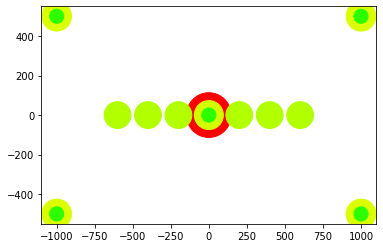

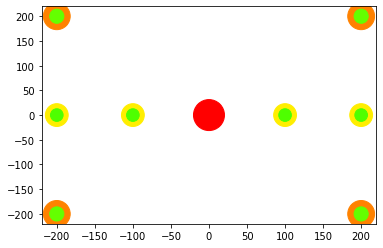

In [ ]:
root_table.create_scatter_plot()
root_chair.create_scatter_plot()

In [ ]:
root_table.generate_tree(verbose=1).show()

TBL10101-501
├── TBL10010-001
├── TBL10010-001
├── TBL10010-001
├── TBL10010-001
├── TBL10102-501
│   ├── TBL10008-001
│   ├── TBL10103-501
│   │   ├── TBL10009-001
│   │   ├── TBL10009-001
│   │   ├── TBL10009-001
│   │   ├── TBL10009-002
│   │   ├── TBL10009-002
│   │   ├── TBL10009-002
│   │   └── TBL10009-003
│   └── TBL10104-501
│       ├── MS14145L3
│       ├── MS14145L3
│       ├── MS14145L3
│       └── MS14145L3
└── TBL10105-501
    ├── MS14145L4
    ├── MS14145L4
    ├── MS14145L4
    ├── MS14145L4
    └── MS14145L4



# Changing the product tree by add/remove items

In [ ]:
root_table.delete_item("jWQLFA")

False

In [ ]:
chair1=root_chair.clone()
chair1.move(-1300,0,0)
chair2=root_chair.clone()
chair2.move(1300,0,0)
chair3=root_chair.clone()
chair3.move(0,800,0)
chair4=root_chair.clone()
chair4.move(0,-800,0)

root_top = Assembly('pn_top', 'root of all', [root_table, chair1,chair2,chair3,chair4])
root_top.generate_tree(verbose=2).show()

pn_top root of all
├── TBL10101-501 table assembly
│   ├── TBL10010-001 table leg
│   ├── TBL10010-001 table leg
│   ├── TBL10010-001 table leg
│   ├── TBL10010-001 table leg
│   ├── TBL10102-501 wooden surface assembly
│   │   ├── TBL10008-001 wood table top
│   │   ├── TBL10103-501 ribs collection
│   │   │   ├── TBL10009-001 plate rib
│   │   │   ├── TBL10009-001 plate rib
│   │   │   ├── TBL10009-001 plate rib
│   │   │   ├── TBL10009-002 plate rib
│   │   │   ├── TBL10009-002 plate rib
│   │   │   ├── TBL10009-002 plate rib
│   │   │   └── TBL10009-003 plate rib
│   │   └── TBL10104-501 fasteners_collection
│   │       ├── MS14145L3 bolt
│   │       ├── MS14145L3 bolt
│   │       ├── MS14145L3 bolt
│   │       └── MS14145L3 bolt
│   └── TBL10105-501 fasteners_collection
│       ├── MS14145L4 bolt
│       ├── MS14145L4 bolt
│       ├── MS14145L4 bolt
│       ├── MS14145L4 bolt
│       └── MS14145L4 bolt
├── TBL10106-501 chair_assy
│   ├── TBL10013-001 chair_leg
│   ├── TBL10013-001

In [ ]:
root_top.create_report("leaf_cost.csv","assembly_time.csv",100)

 10/12/2021, 07:17:44 
                                      REPORT        
                               PN:   pn_top          

Section1: Summary        
               |  labor cost   |   time   |   cost   |
               |    [$/hr]     |   [h]    |   [$]    |
---------------|---------------|----------|----------|
materials      |       -       |    -     |  323.20  |
labor          |      100      |   6.30   |  630.00  |
---------------|---------------|----------|----------|
               |               |          |  953.20  |

Section2: BOM- bill of materials

      PN       |  Description  |weight per| cost per |  Qty   | weight |  cost  
               |               | unit[kg] | unit[$]  |        | total  | total  
--------------------------------------------------------------------------------
TBL10008-001   |wood table top |   2.50   |  48.10   |   1    |  2.50  | 48.10  
TBL10009-001   |plate rib      |   0.90   |   4.70   |   3    |  2.70  | 14.10  
TBL10009-003   |pl

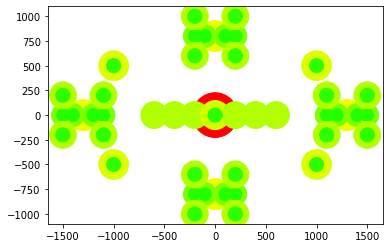

In [ ]:
  root_top.create_scatter_plot()

In [ ]:
import copy
a= [1,2,3]
b= a
b[0] = 4
print(a)
c = copy.deepcopy(a)
c[0] = 10
print(a)
print(c)
print("a_id:",id(a))
print("b_id:",id(b))
print("c_i:",id(c))
root_2= copy.deepcopy(root_chair)
print("root_2:",id(root_2))
print("root_chair:",id(root_chair))
print("root_2_children",(root_2.children))
print("root_chair_children",(root_chair.children))

[4, 2, 3]
[4, 2, 3]
[10, 2, 3]
a_id: 140252155385248
b_id: 140252155385248
c_i: 140252155386208
root_2: 140252154990480
root_chair: 140252168793872
root_2_children [TBL10107-501                 seat plate         4I8MXQ         ch_qty: 3, TBL10013-001                 i2xy5w           0.90           -200            200            250, TBL10013-001                 HMR3GQ           0.90           -200           -200            250, TBL10013-001                 0p3WvQ           0.90            200            200            250, TBL10013-001                 I-HQeg           0.90            200           -200            250, TBL10110-501            fasteners_collection         ZqYxrw         ch_qty: 4]
root_chair_children [TBL10107-501                 seat plate         4I8MXQ         ch_qty: 3, TBL10013-001                 i2xy5w           0.90           -200            200            250, TBL10013-001                 HMR3GQ           0.90           -200           -200            250, TBL10

In [ ]:
#Example of recursive function
def factorial(x):
    if x==1:
        return x
    else:
        return x*(factorial(x-1))

results=[]
for x in range(1,7):
    results.append(factorial(x))
print(results)

[1, 2, 6, 24, 120, 720]


https://riptutorial.com/matplotlib/example/17254/heatmap

https://stackoverflow.com/questions/2369492/generate-a-heatmap-in-matplotlib-using-a-scatter-data-set